In [8]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from tensorflow import keras
# import tsgm
import pandas as pd


In [9]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'

In [96]:
data_df = pd.read_csv('./urban-computing-bus/cleaned.csv')
data_df

,lat,lon,time,stop,next_stop,elapsed,time_Seconds,round_trip
0,18.403981,-66.046373,8:42:35,5.0,6.0,NaN,31355,NaN
1,18.404105,-66.048489,8:43:13,6.0,13.0,38.0,31393,NaN
2,18.404201,-66.049903,8:43:56,13.0,24.0,43.0,31436,NaN
3,18.405122,-66.050338,8:44:52,24.0,23.0,56.0,31492,NaN
4,18.406180,-66.050259,8:45:22,23.0,20.0,30.0,31522,NaN
...,...,...,...,...,...,...,...,...
227,18.406167,-66.043272,14:42:46,2.1,1.0,268.0,52966,16252.0
228,18.407040,-66.042000,14:43:22,1.0,2.2,36.0,53002,16441.0
229,18.406225,-66.043042,14:45:14,2.1,1.0,112.0,53114,NaN
230,18.403648,-66.045337,14:48:24,4.0,5.0,190.0,53304,16316.0


In [137]:
## checking averagestarttime
# data_df[data_df['stop']==5.0].sort_values(['time_Seconds'])


##Stating the two randomtime_ for aug
str(datetime.timedelta(seconds=29500)),str(datetime.timedelta(seconds=30300))

('8:11:40', '8:30:00')

In [123]:
## testing only for one parada a ver

df_parada = data_df[data_df['stop'] == 5]
df_parada
data_df[data_df.index<30]

,lat,lon,time,stop,next_stop,elapsed,time_Seconds,round_trip
0,18.403981,-66.046373,8:42:35,5.0,6.0,NaN,31355,NaN
1,18.404105,-66.048489,8:43:13,6.0,13.0,38.0,31393,NaN
2,18.404201,-66.049903,8:43:56,13.0,24.0,43.0,31436,NaN
3,18.405122,-66.050338,8:44:52,24.0,23.0,56.0,31492,NaN
4,18.406180,-66.050259,8:45:22,23.0,20.0,30.0,31522,NaN
5,18.407194,-66.049543,8:45:59,20.0,19.0,37.0,31559,NaN
6,18.406721,-66.049000,8:46:16,20.0,19.0,17.0,31576,NaN
7,18.406061,-66.048104,8:46:47,9.0,10.0,31.0,31607,NaN
8,18.406627,-66.046957,8:47:16,10.0,11.0,29.0,31636,NaN
9,18.406023,-66.044951,8:48:3,11.0,2.1,47.0,31683,NaN


In [95]:
## roundtrips??? pa ver como se comporta atraves del tiempo???
data_df['round_trip'].count()


145

In [80]:
import numpy as np

original_data = df_parada['time_Seconds'].values
time = df_parada['time'].values
print(time)
print(original_data)





def add_gaussian_noise(data, mean=4., std=10):
    noise = np.random.normal(loc=mean, scale=std, size=data.shape)
    return data + noise
augmented_data = add_gaussian_noise(original_data)

list(augmented_data)-original_data

['8:42:35' '9:0:54' '9:18:9' '9:34:56' '9:50:31' '10:6:27' '8:39:32'
 '8:48:21' '9:8:27' '9:21:39' '8:47:5' '8:47:15' '8:19:38' '8:34:49'
 '8:53:6' '9:40:51' '9:59:20' '10:16:56' '14:48:42']
[31355 32454 33489 34496 35431 36387 31172 31701 32907 33699 31625 31635
 29978 30889 31986 34851 35960 37016 53322]


array([-13.64452225,  10.6832314 ,  -9.45126449,  -2.96404259,
         4.32268771, -16.7255584 ,   3.19123035,   3.23384903,
        -9.26207111,  11.66043981,   7.97127691,   0.28837449,
         7.27810679,   1.05343105,  12.50725792,   3.03126673,
        19.92206857,  12.42780805,  14.29245413])

In [59]:
## 
data_df.groupby('stop').count()

,lat,lon,time,next_stop,elapsed,time_Seconds,round_trip
stop,,,,,,,
1.0,13,13,13,13,13,13,9
2.1,29,29,29,29,29,29,9
3.0,15,15,15,15,15,15,9
4.0,16,16,16,16,16,16,10
5.0,19,19,19,19,15,19,13
6.0,17,17,17,17,17,17,12
9.0,15,15,15,15,15,15,10
10.0,14,14,14,14,14,14,10
11.0,16,16,16,16,16,16,10


In [145]:
## indexes we havev 15 paradas desde el 15 son, 0-60 y 201-231
import math
## for 0-60 we use this code
global_average_per_elapse_stop = {}
global_standard_deviation_per_elapse_stop = {}
def get_average_elapse_per_stop(data_df, offset=0):

    for i,r in data_df.iterrows():

        index = i + offset
        elapsed_time =  data_df[data_df.index==i]['elapsed'].values[0]
        print(elapsed_time)

        if(math.isnan(elapsed_time)):
            continue
        if(index%15 not in global_average_per_elapse_stop):
            global_average_per_elapse_stop[index%15] = {
                'sum':0,
                'elapsed_per_stop':[]
            }
        global_average_per_elapse_stop[index%15]['elapsed_per_stop'].append(elapsed_time)
        global_average_per_elapse_stop[index%15]['sum'] += elapsed_time



            


    # if(index%15 not in global_average_per_elapse_stop):
    #     global_average_per_elapse_stop[index%15] = 

zero_to_sixty = data_df[(data_df.index>=0) & (data_df.index<60)]
get_average_elapse_per_stop(zero_to_sixty, 0)

## for the 201 to 231 we are going to run with offset -1
two_hundred_to_two_thirty_one = data_df[(data_df.index>=201) & (data_df.index<231)]
get_average_elapse_per_stop(two_hundred_to_two_thirty_one, -6)



nan
38.0
43.0
56.0
30.0
37.0
17.0
31.0
29.0
47.0
45.0
96.0
296.0
186.0
120.0
28.0
37.0
48.0
50.0
31.0
21.0
14.0
47.0
36.0
39.0
42.0
64.0
341.0
164.0
71.0
30.0
30.0
57.0
39.0
25.0
21.0
28.0
18.0
43.0
45.0
123.0
77.0
277.0
87.0
92.0
45.0
38.0
37.0
62.0
27.0
34.0
27.0
18.0
30.0
52.0
40.0
80.0
180.0
181.0
102.0
54.0
44.0
71.0
70.0
31.0
52.0
25.0
18.0
38.0
44.0
119.0
89.0
153.0
173.0
101.0
28.0
28.0
54.0
nan
38.0
53.0
43.0
26.0
18.0
36.0
171.0
268.0
36.0
112.0
190.0


In [146]:
global_average_per_elapse_stop
#checking length of each row
for key in global_average_per_elapse_stop:
    print(len(global_average_per_elapse_stop[key]['elapsed_per_stop']))

6
6
5
6
6
6
6
6
6
6
6
6
6
6
5


In [147]:
## removing exceptions
global_average_per_elapse_stop[3]['elapsed_per_stop'] = global_average_per_elapse_stop[3]['elapsed_per_stop'][:-1]
for key in global_average_per_elapse_stop:
    x = 0 
    global_average_per_elapse_stop[key]['sum'] = sum(global_average_per_elapse_stop[key]['elapsed_per_stop'])
    global_average_per_elapse_stop[key]['average'] = sum(global_average_per_elapse_stop[key]['elapsed_per_stop'])/len(global_average_per_elapse_stop[key]['elapsed_per_stop'])
    global_average_per_elapse_stop[key]['standard_deviation'] = np.std(global_average_per_elapse_stop[key]['elapsed_per_stop'])
global_average_per_elapse_stop

{1: {'sum': 215.0,
  'elapsed_per_stop': [38.0, 37.0, 30.0, 38.0, 44.0, 28.0],
  'average': 35.833333333333336,
  'standard_deviation': 5.367080729368206},
 2: {'sum': 310.0,
  'elapsed_per_stop': [43.0, 48.0, 57.0, 37.0, 71.0, 54.0],
  'average': 51.666666666666664,
  'standard_deviation': 10.888321980707383},
 3: {'sum': 207.0,
  'elapsed_per_stop': [56.0, 50.0, 39.0, 62.0],
  'average': 51.75,
  'standard_deviation': 8.496322733983215},
 4: {'sum': 182.0,
  'elapsed_per_stop': [30.0, 31.0, 25.0, 27.0, 31.0, 38.0],
  'average': 30.333333333333332,
  'standard_deviation': 4.068851871911234},
 5: {'sum': 218.0,
  'elapsed_per_stop': [37.0, 21.0, 21.0, 34.0, 52.0, 53.0],
  'average': 36.333333333333336,
  'standard_deviation': 12.905640455070625},
 6: {'sum': 154.0,
  'elapsed_per_stop': [17.0, 14.0, 28.0, 27.0, 25.0, 43.0],
  'average': 25.666666666666668,
  'standard_deviation': 9.303523824635242},
 7: {'sum': 158.0,
  'elapsed_per_stop': [31.0, 47.0, 18.0, 18.0, 18.0, 26.0],
  'avera

In [148]:
############## 
####
####   AQUI ES EL DATA AUGMENTATION
####

In [149]:
paradas = {

5: {
    'lat': 18.403751,
     'lon': -66.046593
},
6:
 {

   
        'lat': 18.403879,
        'lon': -66.048199
       
    },
13:
    {
      
        'lat': 18.403955,
        'lon': -66.049898
        
    },
24: {
        'lat': 18.404698,
        'lon': -66.050468
      },  
23: {
        'lat': 18.406440,
        'lon': -66.050140
      },  
    

20: {
        'lat': 18.407062,
        'lon': -66.049323
       
    },
    19:{
     
        'lat': 18.406503,
        'lon': -66.048520
       
    },
9: {
        'lat': 18.406018,
        'lon': -66.047806
      },  
    
   10: {
        'lat': 18.406766,
        'lon': -66.046771
      },  
    
11: {
        'lat': 18.406078,
        'lon': -66.044770
      },  

   '2.1': {
        'lat': 18.406243,
        'lon': -66.043161
      },  
    
   1: {
        'lat' : 18.407170,
        'lon' : -66.041989
      }, 

   '2.2': {
        'lat': 18.406243,
        'lon': -66.043161
      },  
    
    3: {
        'lat': 18.404856,
        'lon': -66.044836
      },  
          4: {
    'lat':18.403636,
    'lon': -66.045492
},
    }
list_of_stops = list(paradas.keys())
list_of_stops


[5, 6, 13, 24, 23, 20, 19, 9, 10, 11, '2.1', 1, '2.2', 3, 4]

In [121]:
import numpy as np
import statistics
import random



elapsed_per_stop= np.array([43.0, 48.0, 57.0, 37.0, 71.0, 54.0])
print(elapsed_per_stop)
# average = 51.666666666666664
standard_deviation= 10.888321980707383

average =1

def add_gaussian_noise(data, mean=1., std=1):
    noise = np.random.normal(loc=mean, scale=std, size=data.shape)
    return noise

print('average', average)
for i in elapsed_per_stop:
   
    augmented_data = add_gaussian_noise(i, average, standard_deviation)
    augmented_data = elapsed_per_stop + augmented_data
    print('aug',augmented_data)






    



[43. 48. 57. 37. 71. 54.]
average 1
aug [37.24148082 42.24148082 51.24148082 31.24148082 65.24148082 48.24148082]
aug [35.732999 40.732999 49.732999 29.732999 63.732999 46.732999]
aug [54.01514387 59.01514387 68.01514387 48.01514387 82.01514387 65.01514387]
aug [48.41632844 53.41632844 62.41632844 42.41632844 76.41632844 59.41632844]
aug [28.59394819 33.59394819 42.59394819 22.59394819 56.59394819 39.59394819]
aug [48.69782176 53.69782176 62.69782176 42.69782176 76.69782176 59.69782176]


In [168]:






## EJEMPLOOOOO
    
amount_of_cycles_recorded =  len(global_average_per_elapse_stop[0]['elapsed_per_stop'])
##  so ahora realmente vamos a aumentar,primero,
    
    ##cada elapsed_per_stop pertenece a un ciclo distinto. El plan es que si tenemos
    ##
    ## [[37.24148082 42.24148082 51.24148082 31.24148082 65.24148082 48.24148082]]
    ## [[35.732999 40.732999 49.732999 29.732999 63.732999 46.732999]]... entonces, con un valor inicial de 
    ##timeseconds, entonces vamos por el eje  de ysumando stops  y totaltime



#### CAMBIA ESTA VARIABLE SI QUIERES menos ciclos. 
## crea 20 * 15 entrada * amount_of_cycles_recorded,
amount_of_augmentations_cycles = 5

new_augmented_dataframe = pd.DataFrame({
        'time_Seconds':[],
        'round_trip':[],
        'stop':[],
        'time':[],
        'elapsed':[],
        'lat':[],
        'lon':[],
        'next_stop':[],
    })

for  _ in range(amount_of_augmentations_cycles):

        ## 29500 8:11:40	, 30300 8:25:00
    random_first_time_seconds = random.randint(29500,30300)


    ## here we are going to augment each of the stops
    augmented_data = []
    for key in global_average_per_elapse_stop:
        elapsed_per_stop = np.array(global_average_per_elapse_stop[key]['elapsed_per_stop'])
        average = 1
        standard_deviation = global_average_per_elapse_stop[key]['standard_deviation']
        augmented_data.append(elapsed_per_stop+add_gaussian_noise(elapsed_per_stop, average, standard_deviation))
    #print(augmented_data)


    last_time_seconds_per_stop = {}
    for column in range(amount_of_cycles_recorded):

        # last time per stop
        

        for i in range(len(list_of_stops)):
            stop_to_check = paradas[list_of_stops[i]]

            ## so el algoritmo va traverse en eje de y primero (osea cada parada
            ## y luego el eje de x es cada cyclo. 
            try:
                value_to_add = abs(augmented_data[i][column])
            except:
                ## special case, entonces crearvalor y sumarle
                value_to_add = global_average_per_elapse_stop[i]['average']
                value_to_add = value_to_add + add_gaussian_noise(np.array([value_to_add]), average, standard_deviation)[0]
       
            if(column==0 and i==0 ):
                #print('first_stop')
                ## therefore timeis random_first_time_seconds
                time_seconds= random_first_time_seconds
                
                
                
            ## aqui se manejan casos especiales igual
            else:
                time_seconds = time_seconds + math.floor(value_to_add)
            
            ## if we are in the first vuelta, pues no hay roundTrip
            if(column==0):
                round_trip = None
            else:
                round_trip = time_seconds - last_time_seconds_per_stop[i]

            last_time_seconds_per_stop[i] = time_seconds  
            # if(i==0):
            #     round_trip = None
            # else:

            
            
            elapsed = math.floor(value_to_add)

            

            lat = stop_to_check['lat']
            lon = stop_to_check['lon']
            
            stop = list_of_stops[i]
            next_stop = list_of_stops[(i+1)%15]
            time = str(datetime.timedelta(seconds=time_seconds))
            temp = pd.DataFrame({
                'time_Seconds':[time_seconds],
                'round_trip':[round_trip],
                'stop':[stop],
                'time':[time],
                'elapsed':[elapsed],
                'lat':[lat],
                'lon':[lon],
                'next_stop':[next_stop],
            })

            new_augmented_dataframe = pd.concat([new_augmented_dataframe,temp])


            
new_augmented_dataframe




,time_Seconds,round_trip,stop,time,elapsed,lat,lon,next_stop
0,29937.0,None,5.0,8:18:57,34.0,18.403751,-66.046593,6.0
0,29960.0,None,6.0,8:19:20,23.0,18.403879,-66.048199,13.0
0,30010.0,None,13.0,8:20:10,50.0,18.403955,-66.049898,24.0
0,30037.0,None,24.0,8:20:37,27.0,18.404698,-66.050468,23.0
0,30078.0,None,23.0,8:21:18,41.0,18.406440,-66.050140,20.0
...,...,...,...,...,...,...,...,...
0,34969.0,1243,2.1,9:42:49,122.0,18.406243,-66.043161,1
0,35280.0,1497,1,9:48:00,311.0,18.407170,-66.041989,2.2
0,35436.0,1406,2.2,9:50:36,156.0,18.406243,-66.043161,3
0,35554.0,1438,3,9:52:34,118.0,18.404856,-66.044836,4


<Axes: xlabel='stop', ylabel='round_trip'>

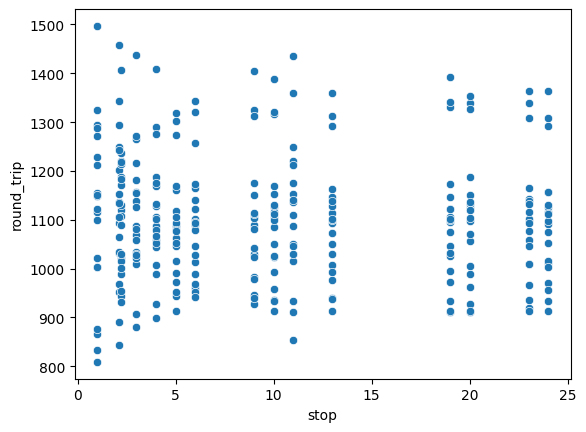

In [169]:
# plot roundtrips,
remove_none_round_trip = new_augmented_dataframe[new_augmented_dataframe['round_trip'].notnull()]
sns.scatterplot(x='stop', y='round_trip', data=remove_none_round_trip)


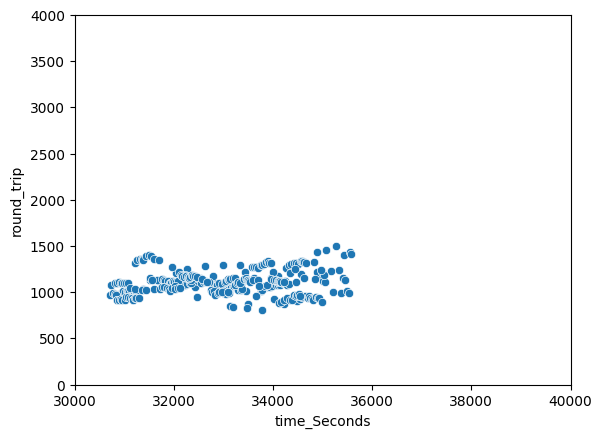

In [170]:
df_c = remove_none_round_trip[['time_Seconds','round_trip']]
sns.scatterplot(data=df_c,x='time_Seconds', y= 'round_trip')
plt.xlim(30000,40000)
plt.ylim(0,4000)
plt.show()

In [173]:
##
## join real with synthethic, and save it
##
new_df = pd.concat([data_df,new_augmented_dataframe])
new_df
new_df.to_csv('./urban-computing-bus/augmented.csv',index=False)
new_augmented_dataframe.to_csv('./urban-computing-bus/augmented_only.csv',index=False)

In [ ]:
### usar la varianza como std

### cada celda del la matriz es un roundtrip, la varianza de ese tiempo con avg de roundtrip me puede servir

### Checking if there is a correlation between roundtrips and time


Correlation between vars
               elapsed  time_Seconds  round_trip
elapsed       1.000000      0.085320    0.135213
time_Seconds  0.085320      1.000000    0.959348
round_trip    0.135213      0.959348    1.000000


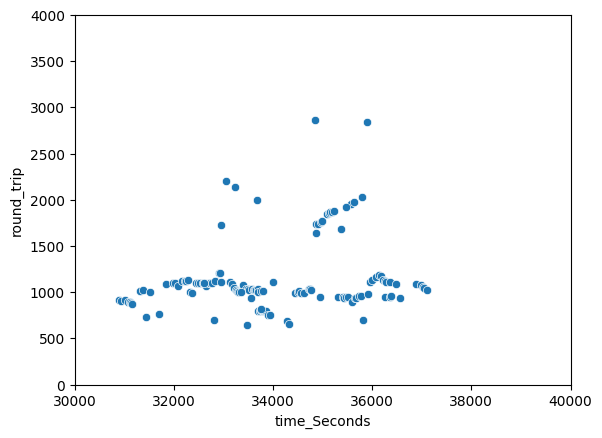

In [105]:
df_c = data_df[['elapsed', 'time_Seconds', 'round_trip']]
cor = df_c.corr()
print("Correlation between vars")
print(cor)


sns.scatterplot(data=df_c,x='time_Seconds', y= 'round_trip')
plt.xlim(30000,40000)
plt.ylim(0,4000)
plt.show()

# sns.kdeplot(x=df["elapsed"], color='blue', label="Time elapsed")
# plt.legend(loc="upper left")
# plt.title("Time elapsed distribution")
# plt.show()

# ps = pd.Series(parada_num)
# ps = ps.apply(lambda x: float(x))

# sns.scatterplot(data=df, x='stop', y='elapsed',hue='stop',palette="tab20").set_xticks(ps)
# plt.title("Time distribution for each stop from previous stop")
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

# sns.scatterplot(data=df, x='stop', y='round_trip',hue='stop',palette="tab20").set_xticks(ps)
# plt.title("Time distribution for each stop from same stop")
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

In [109]:
str(datetime.timedelta(seconds=36000)), str(datetime.timedelta(seconds=37000))

('10:00:00', '10:16:40')